In [333]:
!pip install yfinance --upgrade --quiet

In [334]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [335]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [336]:
from datetime import datetime
end = datetime.now()
start = datetime(2018,1,1)

In [337]:
df1 = yf.download('BTC-USD',start = start, end = end)
df2 = yf.download('ETH-USD',start = start, end = end)
df3 = yf.download('USDT-USD',start =start,end = end)
df4 = yf.download('LTC-USD',start = start, end = end)
df5 = yf.download('BNB-USD',start = start, end = end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


##BTC-USD

In [338]:
df1=df1.rename(columns={'Open':'BTC Open', 'High': 'BTC High','Low':'BTC Low','Close':'BTC Close',
'Adj Close':'BTC Adj Close','Volume':'BTC Volume'})

In [339]:
df1

,BTC Open,BTC High,BTC Low,BTC Close,BTC Adj Close,BTC Volume
Date,,,,,,
2018-01-01,14112.200195,14112.200195,13154.700195,13657.200195,13657.200195,10291200000
2018-01-02,13625.000000,15444.599609,13163.599609,14982.099609,14982.099609,16846600192
2018-01-03,14978.200195,15572.799805,14844.500000,15201.000000,15201.000000,16871900160
2018-01-04,15270.700195,15739.700195,14522.200195,15599.200195,15599.200195,21783199744
2018-01-05,15477.200195,17705.199219,15202.799805,17429.500000,17429.500000,23840899072
...,...,...,...,...,...,...
2022-04-23,39738.722656,39935.859375,39352.203125,39486.730469,39486.730469,16138021249
2022-04-24,39478.375000,39845.925781,39233.539062,39469.292969,39469.292969,17964398167
2022-04-25,39472.605469,40491.753906,38338.378906,40458.308594,40458.308594,35445730570


In [340]:
df1[:10]

,BTC Open,BTC High,BTC Low,BTC Close,BTC Adj Close,BTC Volume
Date,,,,,,
2018-01-01,14112.200195,14112.200195,13154.700195,13657.200195,13657.200195,10291200000
2018-01-02,13625.000000,15444.599609,13163.599609,14982.099609,14982.099609,16846600192
2018-01-03,14978.200195,15572.799805,14844.500000,15201.000000,15201.000000,16871900160
2018-01-04,15270.700195,15739.700195,14522.200195,15599.200195,15599.200195,21783199744
2018-01-05,15477.200195,17705.199219,15202.799805,17429.500000,17429.500000,23840899072
2018-01-06,17462.099609,17712.400391,16764.599609,17527.000000,17527.000000,18314600448
2018-01-07,17527.300781,17579.599609,16087.700195,16477.599609,16477.599609,15866000384
2018-01-08,16476.199219,16537.900391,14208.200195,15170.099609,15170.099609,18413899776
2018-01-09,15123.700195,15497.500000,14424.000000,14595.400391,14595.400391,16659999744


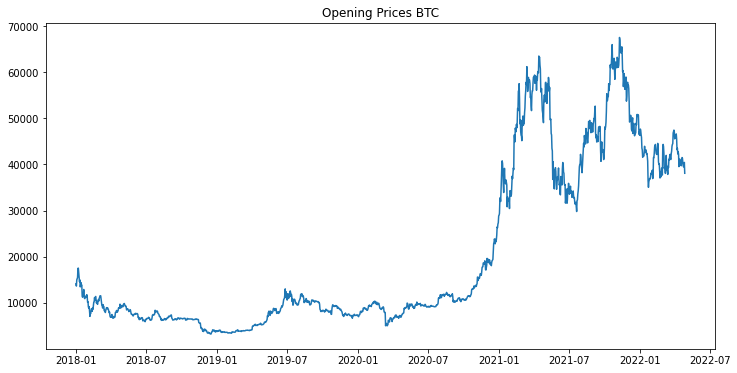

In [341]:
# display
plt.figure(figsize = (12,6))
plt.title('Opening Prices BTC')
plt.plot(df1['BTC Open'])
plt.show()

In [342]:
to_row1 = int(len(df1)*0.9)
to_row1

1420

In [343]:
training_data1 = list(df1[0:to_row1]['BTC Adj Close'])
len(training_data1)

[13657.2001953125,
 14982.099609375,
 15201.0,
 15599.2001953125,
 17429.5,
 17527.0,
 16477.599609375,
 15170.099609375,
 14595.400390625,
 14973.2998046875,
 13405.7998046875,
 13980.599609375,
 14360.2001953125,
 13772.0,
 13819.7998046875,
 11490.5,
 11188.599609375,
 11474.900390625,
 11607.400390625,
 12899.2001953125,
 11600.099609375,
 10931.400390625,
 10868.400390625,
 11359.400390625,
 11259.400390625,
 11171.400390625,
 11440.7001953125,
 11786.2998046875,
 11296.400390625,
 10106.2998046875,
 10221.099609375,
 9170.5400390625,
 8830.75,
 9174.91015625,
 8277.009765625,
 6955.27001953125,
 7754.0,
 7621.2998046875,
 8265.58984375,
 8736.98046875,
 8621.900390625,
 8129.97021484375,
 8926.5703125,
 8598.3095703125,
 9494.6298828125,
 10166.400390625,
 10233.900390625,
 11112.7001953125,
 10551.7998046875,
 11225.2998046875,
 11403.7001953125,
 10690.400390625,
 10005.0,
 10301.099609375,
 9813.0703125,
 9664.73046875,
 10366.7001953125,
 10725.599609375,
 10397.900390625,
 1

In [344]:
testing_data1 = list(df1[to_row1:]['BTC Adj Close'])
testing_data1

[58730.4765625,
 56289.2890625,
 57569.07421875,
 56280.42578125,
 57274.6796875,
 53569.765625,
 54815.078125,
 57248.45703125,
 57806.56640625,
 57005.42578125,
 57229.828125,
 56477.81640625,
 53598.24609375,
 49200.703125,
 49368.84765625,
 50582.625,
 50700.0859375,
 50504.796875,
 47672.12109375,
 47243.3046875,
 49362.5078125,
 50098.3359375,
 46737.48046875,
 46612.6328125,
 48896.72265625,
 47665.42578125,
 46202.14453125,
 46848.77734375,
 46707.015625,
 46880.27734375,
 48936.61328125,
 48628.51171875,
 50784.5390625,
 50822.1953125,
 50429.859375,
 50809.515625,
 50640.41796875,
 47588.85546875,
 46444.7109375,
 47178.125,
 46306.4453125,
 47686.8125,
 47345.21875,
 46458.1171875,
 45897.57421875,
 43569.00390625,
 43160.9296875,
 41557.90234375,
 41733.94140625,
 41911.6015625,
 41821.26171875,
 42735.85546875,
 43949.1015625,
 42591.5703125,
 43099.69921875,
 43177.3984375,
 43113.87890625,
 42250.55078125,
 42375.6328125,
 41744.328125,
 40680.41796875,
 36457.31640625,


In [345]:
len(testing_data1)

158

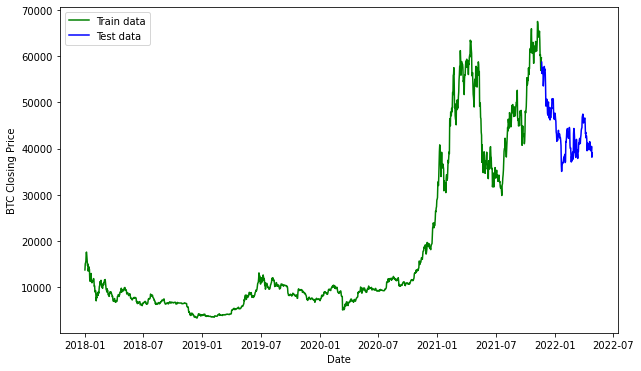

In [346]:
plt.figure(figsize=(10,6))
plt.grid = (True)
plt.xlabel('Date')
plt.ylabel('BTC Closing Price')
plt.plot(df1[0:to_row1]['BTC Adj Close'],'green',label='Train data')
plt.plot(df1[to_row1:]['BTC Adj Close'],'blue',label='Test data')
plt.legend()
plt.show()

In [347]:
model_predications1 = []
n_test_obser1 = len(testing_data1)

In [348]:
for i in range(n_test_obser1):
    model1 = ARIMA(training_data1, order = (4,1,0))
    model_fit1 = model1.fit()
    output1 = model_fit1.forecast()
    yhat1 = list(output1[0])[0]
    actual_test_value1 = testing_data1[i]
    training_data1.append(actual_test_value1)
    model_predications1.append(yhat1)

In [349]:
print(model_fit1.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 1576
Model:                 ARIMA(4, 1, 0)   Log Likelihood              -13175.244
Method:                       css-mle   S.D. of innovations           1033.789
Date:                Wed, 27 Apr 2022   AIC                          26362.489
Time:                        18:33:55   BIC                          26394.665
Sample:                             1   HQIC                         26374.446
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.5535     26.560      0.586      0.558     -36.503      67.611
ar.L1.D.y     -0.0304      0.025     -1.207      0.228      -0.080       0.019
ar.L2.D.y     -0.0026      0.025     -0.102      0.9

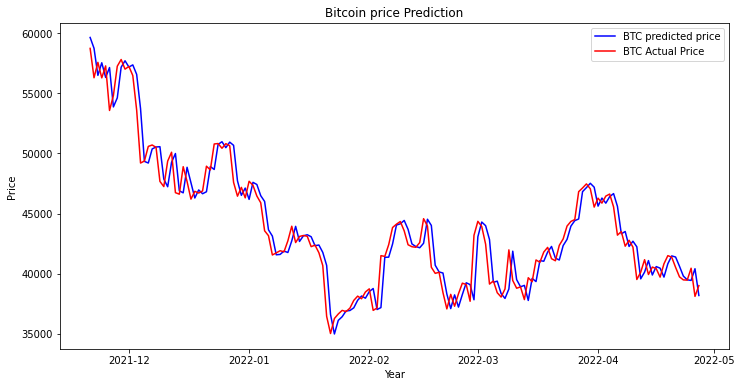

In [350]:
plt.figure(figsize=(12,6))
plt.grid = (True)
date_range1 = df1[to_row1:].index

plt.plot(date_range1, model_predications1,color = 'blue',label ='BTC predicted price')
plt.plot(date_range1,testing_data1,color = 'red', label = 'BTC Actual Price')

plt.title('Bitcoin price Prediction')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()
plt.show()

##ETH-USD

In [351]:
df2=df2.rename(columns={'Open':'ETH Open', 'High': 'ETH High','Low':'ETH Low','Close':'ETH Close',
'Adj Close':'ETH Adj Close','Volume':'ETH Volume'})

In [352]:
df2

,ETH Open,ETH High,ETH Low,ETH Close,ETH Adj Close,ETH Volume
Date,,,,,,
2018-01-01,755.757019,782.530029,742.004028,772.640991,772.640991,2595760128
2018-01-02,772.346008,914.830017,772.346008,884.443970,884.443970,5783349760
2018-01-03,886.000000,974.471008,868.450989,962.719971,962.719971,5093159936
2018-01-04,961.713013,1045.079956,946.085999,980.921997,980.921997,6502859776
2018-01-05,975.750000,1075.390015,956.325012,997.719971,997.719971,6683149824
...,...,...,...,...,...,...
2022-04-23,2964.802246,2975.322754,2926.740234,2938.114014,2938.114014,9116955609
2022-04-24,2937.347168,2961.882080,2922.128662,2922.732666,2922.732666,9696829579
2022-04-25,2922.990234,3018.415527,2804.507080,3009.393555,3009.393555,22332690614


In [353]:
df2[:10]

,ETH Open,ETH High,ETH Low,ETH Close,ETH Adj Close,ETH Volume
Date,,,,,,
2018-01-01,755.757019,782.530029,742.004028,772.640991,772.640991,2595760128
2018-01-02,772.346008,914.830017,772.346008,884.443970,884.443970,5783349760
2018-01-03,886.000000,974.471008,868.450989,962.719971,962.719971,5093159936
2018-01-04,961.713013,1045.079956,946.085999,980.921997,980.921997,6502859776
2018-01-05,975.750000,1075.390015,956.325012,997.719971,997.719971,6683149824
2018-01-06,995.153992,1060.709961,994.622009,1041.680054,1041.680054,4662219776
2018-01-07,1043.010010,1153.170044,1043.010010,1153.170044,1153.170044,5569880064
2018-01-08,1158.260010,1266.930054,1016.049988,1148.530029,1148.530029,8450970112
2018-01-09,1146.000000,1320.979980,1145.489990,1299.739990,1299.739990,7965459968


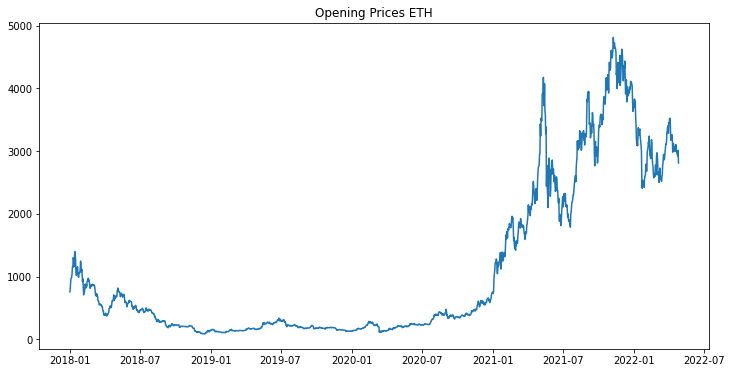

In [354]:
# display
plt.figure(figsize = (12,6))
plt.title('Opening Prices ETH')
plt.plot(df2['ETH Open'])
plt.show()

In [355]:
to_row2 = int(len(df1)*0.9)
to_row2

1420

In [356]:
training_data2 = list(df2[0:to_row2]['ETH Adj Close'])
training_data2

[772.6409912109375,
 884.4439697265625,
 962.719970703125,
 980.9219970703125,
 997.719970703125,
 1041.6800537109375,
 1153.1700439453125,
 1148.530029296875,
 1299.739990234375,
 1255.8199462890625,
 1154.9300537109375,
 1273.199951171875,
 1396.4200439453125,
 1366.77001953125,
 1291.9200439453125,
 1053.68994140625,
 1014.25,
 1036.280029296875,
 1039.0999755859375,
 1155.1500244140625,
 1049.5799560546875,
 1003.260009765625,
 986.22900390625,
 1058.780029296875,
 1056.030029296875,
 1055.1700439453125,
 1107.0699462890625,
 1246.010009765625,
 1182.3599853515625,
 1071.1300048828125,
 1118.31005859375,
 1036.7900390625,
 915.7849731445312,
 964.0189819335938,
 834.6820068359375,
 697.9509887695312,
 793.1220092773438,
 757.0679931640625,
 817.8070068359375,
 883.864990234375,
 860.4149780273438,
 814.6599731445312,
 868.7069702148438,
 845.2579956054688,
 923.5609741210938,
 936.9760131835938,
 944.2100219726562,
 974.114990234375,
 923.9210205078125,
 943.864990234375,
 895.3709

In [357]:
len(testing_data2)

158

In [358]:
testing_data2 = list(df2[to_row2:]['ETH Adj Close'])
testing_data2

[4269.73291015625,
 4088.457763671875,
 4340.763671875,
 4239.9814453125,
 4274.7431640625,
 4030.908935546875,
 4096.912109375,
 4294.45361328125,
 4445.10498046875,
 4631.47900390625,
 4586.990234375,
 4511.30224609375,
 4220.7060546875,
 4119.58740234375,
 4198.32275390625,
 4358.7373046875,
 4315.0615234375,
 4439.35791015625,
 4119.81591796875,
 3908.49609375,
 4084.452392578125,
 4134.453125,
 3784.226806640625,
 3745.4404296875,
 4018.388671875,
 3962.4697265625,
 3879.486572265625,
 3960.860107421875,
 3922.592529296875,
 3933.844482421875,
 4020.260009765625,
 3982.099609375,
 4108.015625,
 4047.98291015625,
 4093.281005859375,
 4067.328125,
 4037.547607421875,
 3800.89306640625,
 3628.53173828125,
 3713.85205078125,
 3682.6328125,
 3769.697021484375,
 3829.56494140625,
 3761.38037109375,
 3794.056640625,
 3550.386962890625,
 3418.408203125,
 3193.21044921875,
 3091.97265625,
 3157.75146484375,
 3083.097900390625,
 3238.111572265625,
 3372.25830078125,
 3248.28857421875,
 3310

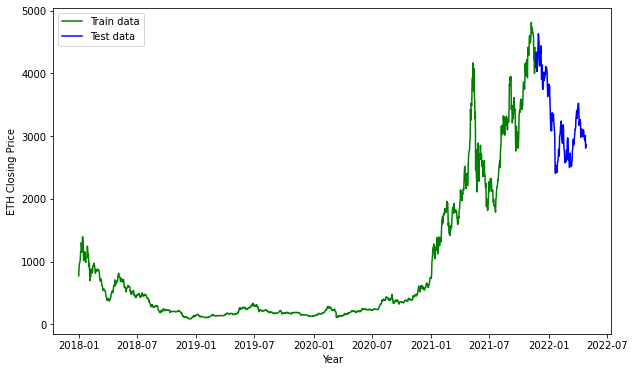

In [359]:
plt.figure(figsize=(10,6))
plt.grid = (True)
plt.xlabel('Year')
plt.ylabel('ETH Closing Price')
plt.plot(df2[0:to_row2]['ETH Adj Close'],'green',label='Train data')
plt.plot(df2[to_row2:]['ETH Adj Close'],'blue',label='Test data')
plt.legend()
plt.show()

In [360]:
model_predications2 = []
n_test_obser2 = len(testing_data2)

In [361]:
for i in range(n_test_obser2):
    model2 = ARIMA(training_data2, order = (4,1,0))
    model_fit2 = model2.fit()
    output2 = model_fit2.forecast()
    yhat2 = list(output2[0])[0]
    actual_test_value2 = testing_data2[i]
    training_data2.append(actual_test_value2)
    model_predications2.append(yhat2)

In [362]:
print(model_fit2.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 1576
Model:                 ARIMA(4, 1, 0)   Log Likelihood               -9147.671
Method:                       css-mle   S.D. of innovations             80.272
Date:                Wed, 27 Apr 2022   AIC                          18307.341
Time:                        18:34:23   BIC                          18339.517
Sample:                             1   HQIC                         18319.299
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2986      2.032      0.639      0.523      -2.684       5.282
ar.L1.D.y     -0.0691      0.025     -2.739      0.006      -0.118      -0.020
ar.L2.D.y      0.0014      0.025      0.054      0.9

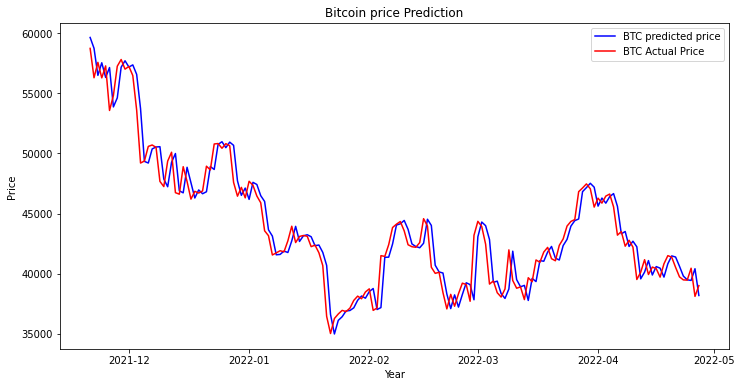

In [363]:
plt.figure(figsize=(12,6))
plt.grid = (True)
date_range2 = df2[to_row2:].index

plt.plot(date_range1, model_predications1,color = 'blue',label ='BTC predicted price')
plt.plot(date_range1,testing_data1,color = 'red', label = 'BTC Actual Price')

plt.title('Bitcoin price Prediction')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()
plt.show()

##USDT-USD

In [364]:
df3=df3.rename(columns={'Open':'USDT Open', 'High': 'USDT High','Low':'USDT Low','Close':'USDT Close',
'Adj Close':'USDT Adj Close','Volume':'USDT Volume'})

In [365]:
df2[:10]

,ETH Open,ETH High,ETH Low,ETH Close,ETH Adj Close,ETH Volume
Date,,,,,,
2018-01-01,755.757019,782.530029,742.004028,772.640991,772.640991,2595760128
2018-01-02,772.346008,914.830017,772.346008,884.443970,884.443970,5783349760
2018-01-03,886.000000,974.471008,868.450989,962.719971,962.719971,5093159936
2018-01-04,961.713013,1045.079956,946.085999,980.921997,980.921997,6502859776
2018-01-05,975.750000,1075.390015,956.325012,997.719971,997.719971,6683149824
2018-01-06,995.153992,1060.709961,994.622009,1041.680054,1041.680054,4662219776
2018-01-07,1043.010010,1153.170044,1043.010010,1153.170044,1153.170044,5569880064
2018-01-08,1158.260010,1266.930054,1016.049988,1148.530029,1148.530029,8450970112
2018-01-09,1146.000000,1320.979980,1145.489990,1299.739990,1299.739990,7965459968


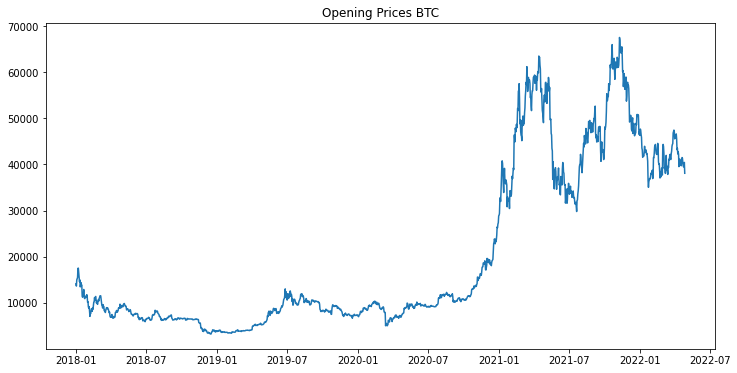

In [366]:
# display
plt.figure(figsize = (12,6))
plt.title('Opening Prices BTC')
plt.plot(df1['BTC Open'])
plt.show()

In [367]:
to_row1 = int(len(df1)*0.9)
to_row1

1420

In [368]:
training_data1 = list(df1[0:to_row1]['BTC Adj Close'])
training_data1

[13657.2001953125,
 14982.099609375,
 15201.0,
 15599.2001953125,
 17429.5,
 17527.0,
 16477.599609375,
 15170.099609375,
 14595.400390625,
 14973.2998046875,
 13405.7998046875,
 13980.599609375,
 14360.2001953125,
 13772.0,
 13819.7998046875,
 11490.5,
 11188.599609375,
 11474.900390625,
 11607.400390625,
 12899.2001953125,
 11600.099609375,
 10931.400390625,
 10868.400390625,
 11359.400390625,
 11259.400390625,
 11171.400390625,
 11440.7001953125,
 11786.2998046875,
 11296.400390625,
 10106.2998046875,
 10221.099609375,
 9170.5400390625,
 8830.75,
 9174.91015625,
 8277.009765625,
 6955.27001953125,
 7754.0,
 7621.2998046875,
 8265.58984375,
 8736.98046875,
 8621.900390625,
 8129.97021484375,
 8926.5703125,
 8598.3095703125,
 9494.6298828125,
 10166.400390625,
 10233.900390625,
 11112.7001953125,
 10551.7998046875,
 11225.2998046875,
 11403.7001953125,
 10690.400390625,
 10005.0,
 10301.099609375,
 9813.0703125,
 9664.73046875,
 10366.7001953125,
 10725.599609375,
 10397.900390625,
 1

In [369]:
testing_data1 = list(df1[to_row1:]['BTC Adj Close'])
testing_data1

[58730.4765625,
 56289.2890625,
 57569.07421875,
 56280.42578125,
 57274.6796875,
 53569.765625,
 54815.078125,
 57248.45703125,
 57806.56640625,
 57005.42578125,
 57229.828125,
 56477.81640625,
 53598.24609375,
 49200.703125,
 49368.84765625,
 50582.625,
 50700.0859375,
 50504.796875,
 47672.12109375,
 47243.3046875,
 49362.5078125,
 50098.3359375,
 46737.48046875,
 46612.6328125,
 48896.72265625,
 47665.42578125,
 46202.14453125,
 46848.77734375,
 46707.015625,
 46880.27734375,
 48936.61328125,
 48628.51171875,
 50784.5390625,
 50822.1953125,
 50429.859375,
 50809.515625,
 50640.41796875,
 47588.85546875,
 46444.7109375,
 47178.125,
 46306.4453125,
 47686.8125,
 47345.21875,
 46458.1171875,
 45897.57421875,
 43569.00390625,
 43160.9296875,
 41557.90234375,
 41733.94140625,
 41911.6015625,
 41821.26171875,
 42735.85546875,
 43949.1015625,
 42591.5703125,
 43099.69921875,
 43177.3984375,
 43113.87890625,
 42250.55078125,
 42375.6328125,
 41744.328125,
 40680.41796875,
 36457.31640625,


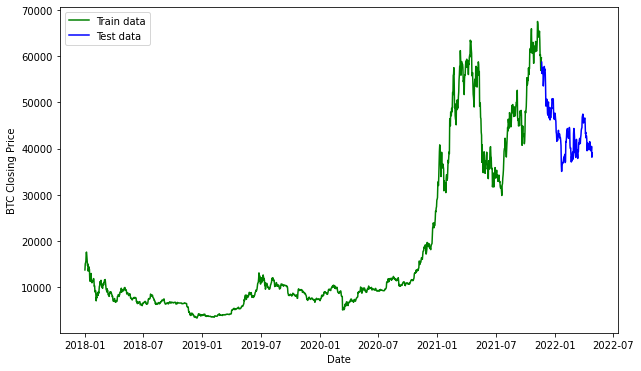

In [370]:
plt.figure(figsize=(10,6))
plt.grid = (True)
plt.xlabel('Date')
plt.ylabel('BTC Closing Price')
plt.plot(df1[0:to_row1]['BTC Adj Close'],'green',label='Train data')
plt.plot(df1[to_row1:]['BTC Adj Close'],'blue',label='Test data')
plt.legend()
plt.show()

In [371]:
model_predications1 = []
n_test_obser1 = len(testing_data1)

In [ ]:
for i in range(n_test_obser1):
    model1 = ARIMA(training_data1, order = (4,1,0))
    model_fit1 = model1.fit()
    output1 = model_fit1.forecast()
    yhat1 = list(output1[0])[0]
    actual_test_value1 = testing_data1[i]
    training_data1.append(actual_test_value1)
    model_predications1.append(yhat1)

In [ ]:
print(model_fit1.summary())

In [ ]:
plt.figure(figsize=(12,6))
plt.grid = (True)
date_range1 = df1[to_row1:].index

plt.plot(date_range1, model_predications1,color = 'blue',label ='BTC predicted price')
plt.plot(date_range1,testing_data1,color = 'red', label = 'BTC Actual Price')

plt.title('Bitcoin price Prediction')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()
plt.show()

##LTC-USD

In [ ]:
df4=df4.rename(columns={'Open':'LTC Open', 'High': 'LTC High','Low':'LTC Low','Close':'LTC Close',
'Adj Close':'LTC Adj Close','Volume':'LTC Volume'})

In [ ]:
df2[:10]

In [ ]:
# display
plt.figure(figsize = (12,6))
plt.title('Opening Prices BTC')
plt.plot(df1['BTC Open'])
plt.show()

In [ ]:
to_row1 = int(len(df1)*0.9)
to_row1

In [ ]:
training_data1 = list(df1[0:to_row1]['BTC Adj Close'])
training_data1

In [ ]:
testing_data1 = list(df1[to_row1:]['BTC Adj Close'])
testing_data1

In [ ]:
plt.figure(figsize=(10,6))
plt.grid = (True)
plt.xlabel('Year')
plt.ylabel('BTC Closing Price')
plt.plot(df1[0:to_row1]['BTC Adj Close'],'green',label='Train data')
plt.plot(df1[to_row1:]['BTC Adj Close'],'blue',label='Test data')
plt.legend()
plt.show()

In [ ]:
model_predications1 = []
n_test_obser1 = len(testing_data1)

In [ ]:
for i in range(n_test_obser1):
    model1 = ARIMA(training_data1, order = (4,1,0))
    model_fit1 = model1.fit()
    output1 = model_fit1.forecast()
    yhat1 = list(output1[0])[0]
    actual_test_value1 = testing_data1[i]
    training_data1.append(actual_test_value1)
    model_predications1.append(yhat1)

In [ ]:
print(model_fit1.summary())

In [ ]:
plt.figure(figsize=(12,6))
plt.grid = (True)
date_range1 = df1[to_row1:].index

plt.plot(date_range1, model_predications1,color = 'blue',label ='BTC predicted price')
plt.plot(date_range1,testing_data1,color = 'red', label = 'BTC Actual Price')

plt.title('Bitcoin price Prediction')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()
plt.show()

##BNB-USD

In [ ]:
df5=df5.rename(columns={'Open':'BNB Open', 'High': 'BNB High','Low':'BNB Low','Close':'BNB Close',
'Adj Close':'BNB Adj Close','Volume':'BNB Volume'})

In [ ]:
df2[:10]

In [ ]:
# display
plt.figure(figsize = (12,6))
plt.title('Opening Prices BTC')
plt.plot(df1['BTC Open'])
plt.show()

In [ ]:
to_row1 = int(len(df1)*0.9)
to_row1

In [ ]:
training_data1 = list(df1[0:to_row1]['BTC Adj Close'])
training_data1

In [ ]:
testing_data1 = list(df1[to_row1:]['BTC Adj Close'])
testing_data1

In [ ]:
plt.figure(figsize=(10,6))
plt.grid = (True)
plt.xlabel('Year')
plt.ylabel('BTC Closing Price')
plt.plot(df1[0:to_row1]['BTC Adj Close'],'green',label='Train data')
plt.plot(df1[to_row1:]['BTC Adj Close'],'blue',label='Test data')
plt.legend()
plt.show()

In [ ]:
model_predications1 = []
n_test_obser1 = len(testing_data1)

In [ ]:
for i in range(n_test_obser1):
    model1 = ARIMA(training_data1, order = (4,1,0))
    model_fit1 = model1.fit()
    output1 = model_fit1.forecast()
    yhat1 = list(output1[0])[0]
    actual_test_value1 = testing_data1[i]
    training_data1.append(actual_test_value1)
    model_predications1.append(yhat1)

In [ ]:
print(model_fit1.summary())

In [ ]:
plt.figure(figsize=(12,6))
plt.grid = (True)
date_range1 = df1[to_row1:].index

plt.plot(date_range1, model_predications1,color = 'blue',label ='BTC predicted price')
plt.plot(date_range1,testing_data1,color = 'red', label = 'BTC Actual Price')

plt.title('Bitcoin price Prediction')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()
plt.show()

##Combined Result

In [ ]:
result = pd.concat([df1, df2,df3,df4,df5], axis=1)

In [ ]:
result

In [ ]:
result=result.dropna()

In [ ]:
result

In [ ]:
result.isnull().sum()

In [ ]:
result.reset_index()

In [ ]:
result.head()

In [ ]:
result.isnull().sum()

In [ ]:
result.duplicated().sum()

In [ ]:
result.nunique()

In [ ]:
result.describe()

In [ ]:
result1= result.copy()
result1=result1.reset_index()
result1['Year']=result1.Date.apply(lambda x:x.year)
result1

In [ ]:
x=result1.Year
y=result1["BTC Adj Close"]
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 20,
        }

In [ ]:
plt.figure(figsize=(12,6))
plt.xlabel("Year",fontdict=font)
plt.ylabel("BTC Open",fontdict=font)
plt.xticks(fontsize=20,color="r")
plt.yticks(fontsize=20,color="r")
plt.plot(x,y,color="g")
plt.show()

In [ ]:
testing_data2 = list(df2[to_row2:]['ETH Adj Close'])
testing_data2


In [ ]:
to_row3 = int(len(df3)*0.9)
training_data3 = list(df3[0:to_row3]['USDT Adj Close'])
training_data3

In [ ]:
testing_data3 = list(df3[to_row3:]['USDT Adj Close'])
testing_data3

In [ ]:
to_row4 = int(len(df4)*0.9)
training_data4 = list(df4[0:to_row4]['LTC Adj Close'])
training_data4

In [ ]:
testing_data4 = list(df4[to_row4:]['LTC Adj Close'])
testing_data4

In [ ]:
to_row5 = int(len(df5)*0.9)
training_data5 = list(df5[0:to_row5]['BNB Adj Close'])
training_data5


In [ ]:
testing_data5 = list(df5[to_row5:]['BNB Adj Close'])
testing_data5

In [ ]:
plt.figure(figsize=(10,6))
plt.grid = (True)
plt.xlabel('Date')
plt.ylabel('BTC Closing Price')
plt.plot(df1[0:to_row1]['BTC Adj Close'],'green',label='Train data')
plt.plot(df1[to_row1:]['BTC Adj Close'],'blue',label='Test data')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(10,6))
plt.grid = (True)
plt.xlabel('Date')
plt.ylabel('ETH Closing Price')
plt.plot(df2[0:to_row2]['ETH Adj Close'],'green',label='Train data')
plt.plot(df2[to_row2:]['ETH Adj Close'],'blue',label='Test data')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(10,6))
plt.grid = (True)
plt.xlabel('Date')
plt.ylabel('USDT Closing Price')
plt.plot(df3[0:to_row3]['USDT Adj Close'],'green',label='Train data')
plt.plot(df3[to_row3:]['USDT Adj Close'],'blue',label='Test data')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(10,6))
plt.grid = (True)
plt.xlabel('Date')
plt.ylabel('LTC Closing Price')
plt.plot(df4[0:to_row4]['LTC Adj Close'],'green',label='Train data')
plt.plot(df4[to_row4:]['LTC Adj Close'],'blue',label='Test data')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(10,6))
plt.grid = (True)
plt.xlabel('Date')
plt.ylabel('BNB Closing Price')
plt.plot(df5[0:to_row5]['BNB Adj Close'],'green',label='Train data')
plt.plot(df5[to_row5:]['BNB Adj Close'],'blue',label='Test data')
plt.legend()
plt.show()

In [ ]:
model_predications1 = []
n_test_obser1 = len(testing_data1)


In [ ]:
model_predications2 = []
n_test_obser2 = len(testing_data2)


In [ ]:
model_predications3 = []
n_test_obser3 = len(testing_data3)


In [ ]:
model_predications4 = []
n_test_obser4 = len(testing_data4)


In [ ]:
model_predications5 = []
n_test_obser5 = len(testing_data5)


In [ ]:
for i in range(n_test_obser1):
    model1 = ARIMA(training_data1, order = (4,1,0))
    model_fit1 = model1.fit()
    output1 = model_fit1.forecast()
    yhat1 = list(output1[0])[0]
    actual_test_value1 = testing_data1[i]
    training_data1.append(actual_test_value1)
    model_predications1.append(yhat1)

In [ ]:
print(model_fit1.summary())

In [ ]:
model_predications2 = []
n_test_obser2 = len(testing_data2)


In [ ]:
for i in range(n_test_obser2):
    model2 = ARIMA(training_data2, order = (4,1,0))
    model_fit2 = model2.fit()
    output2 = model_fit2.forecast()
    yhat2 = list(output2[0])[0]
    actual_test_value2 = testing_data2[i]
    training_data2.append(actual_test_value2)
    model_predications2.append(yhat2)

In [ ]:
print(model_fit2.summary())

In [ ]:
model_predications3 = []
n_test_obser3 = len(testing_data3)


In [ ]:
for i in range(n_test_obser3):
    model3 = ARIMA(training_data3, order = (4,1,0))
    model_fit3 = model3.fit()
    output3 = model_fit3.forecast()
    yhat3 = list(output3[0])[0]
    actual_test_value3 = testing_data3[i]
    training_data3.append(actual_test_value3)
    model_predications3.append(yhat3)

In [ ]:
print(model_fit3.summary())

In [ ]:
model_predications4 = []
n_test_obser4 = len(testing_data4)


In [ ]:
for i in range(n_test_obser4):
    model4 = ARIMA(training_data4, order = (4,1,0))
    model_fit4 = model4.fit()
    output4 = model_fit4.forecast()
    yhat4 = list(output4[0])[0]
    actual_test_value4 = testing_data4[i]
    training_data4.append(actual_test_value4)
    model_predications4.append(yhat4)

In [ ]:
print(model_fit4.summary())

In [ ]:
model_predications5 = []
n_test_obser5 = len(testing_data5)


In [ ]:
for i in range(n_test_obser5):
    model5 = ARIMA(training_data5, order = (4,1,0))
    model_fit5 = model5.fit()
    output5 = model_fit5.forecast()
    yhat5 = list(output5[0])[0]
    actual_test_value5 = testing_data5[i]
    training_data5.append(actual_test_value5)
    model_predications5.append(yhat5)

In [ ]:
print(model_fit5.summary())

In [ ]:
plt.figure(figsize=(20,10))
plt.grid = (True)
date_range1 = df1[to_row1:].index

plt.plot(date_range1, model_predications1,color = 'blue',label ='BTC predicted price')
plt.plot(date_range1,testing_data1,color = 'red', label = 'BTC Actual Price')

plt.title('Bitcoin price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(15,9))
plt.grid = (True)
date_range2 = df2[to_row2:].index

plt.plot(date_range2, model_predications2,color = 'blue',label ='ETH predicted price')
plt.plot(date_range2,testing_data2,color = 'red', label = 'ETH Actual Price')

plt.title('ETH price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(15,9))
plt.grid = (True)
date_range3 = df3[to_row3:].index

plt.plot(date_range3, model_predications3,color = 'blue',label ='BTC predicted price')
plt.plot(date_range3,testing_data3,color = 'red', label = 'BTC Actual Price')

plt.title('Bitcoin price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(15,9))
plt.grid = (True)
date_range4 = df4[to_row4:].index

plt.plot(date_range4, model_predications4 ,color = 'blue',label ='BTC predicted price')
plt.plot(date_range4,testing_data4,color = 'red', label = 'BTC Actual Price')

plt.title('Bitcoin price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(15,9))
plt.grid = (True)
date_range5 = df5[to_row5:].index

plt.plot(date_range5, model_predications5,color = 'blue',label ='BTC predicted price')
plt.plot(date_range5,testing_data5,color = 'red', label = 'BTC Actual Price')

plt.title('Bitcoin price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()